In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Functions_Vincent import *
from sklearn import preprocessing

pd.options.display.max_columns = 50
pd.options.display.max_rows = 100
pd.set_option('display.width', 1000)

#Types de couleurs utilisées pour les comparaisons de grade
colors=["limegreen","gold", "darkorange", "red","steelblue","purple","black","grey","pink"]

from matplotlib import style
#style.use('dark_background')
style.use('default')

In [174]:
# Regardons le nom des colonne, le type de variable et leurs taux de valeurs utilisables
Df_category_name = pd.read_csv('product_category_name_translation.csv').drop_duplicates()
print('Df_category_name')
print(Df_category_name.columns.values)
info_data_unique(Df_category_name)
print(' ')
#for cat_en, cat_port in zip(Df_category_name.product_category_name_english,Df_category_name.product_category_name) :
#    print(cat_en,"---",cat_port)

Df_category_name
['product_category_name' 'product_category_name_english']
les colonnes sont de types :   [dtype('O')]
  
il y a : 71 lignes, 2 colonnes
  
il y a : 100.0 % de valeurs utilisables
 


In [175]:
Df_sellers = pd.read_csv('olist_sellers_dataset.csv').drop_duplicates()
print('Df_sellers')
print(Df_sellers.columns.values)
info_data_unique(Df_sellers)
Df_sellers.nunique()

Df_sellers
['seller_id' 'seller_zip_code_prefix' 'seller_city' 'seller_state']
les colonnes sont de types :   [dtype('O') dtype('int64')]
  
il y a : 3095 lignes, 4 colonnes
  
il y a : 100.0 % de valeurs utilisables


seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

Df_products
['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']
les colonnes sont de types :   [dtype('O') dtype('float64')]
  
il y a : 32951 lignes, 9 colonnes
  
il y a : 99.2 % de valeurs utilisables
Df_products


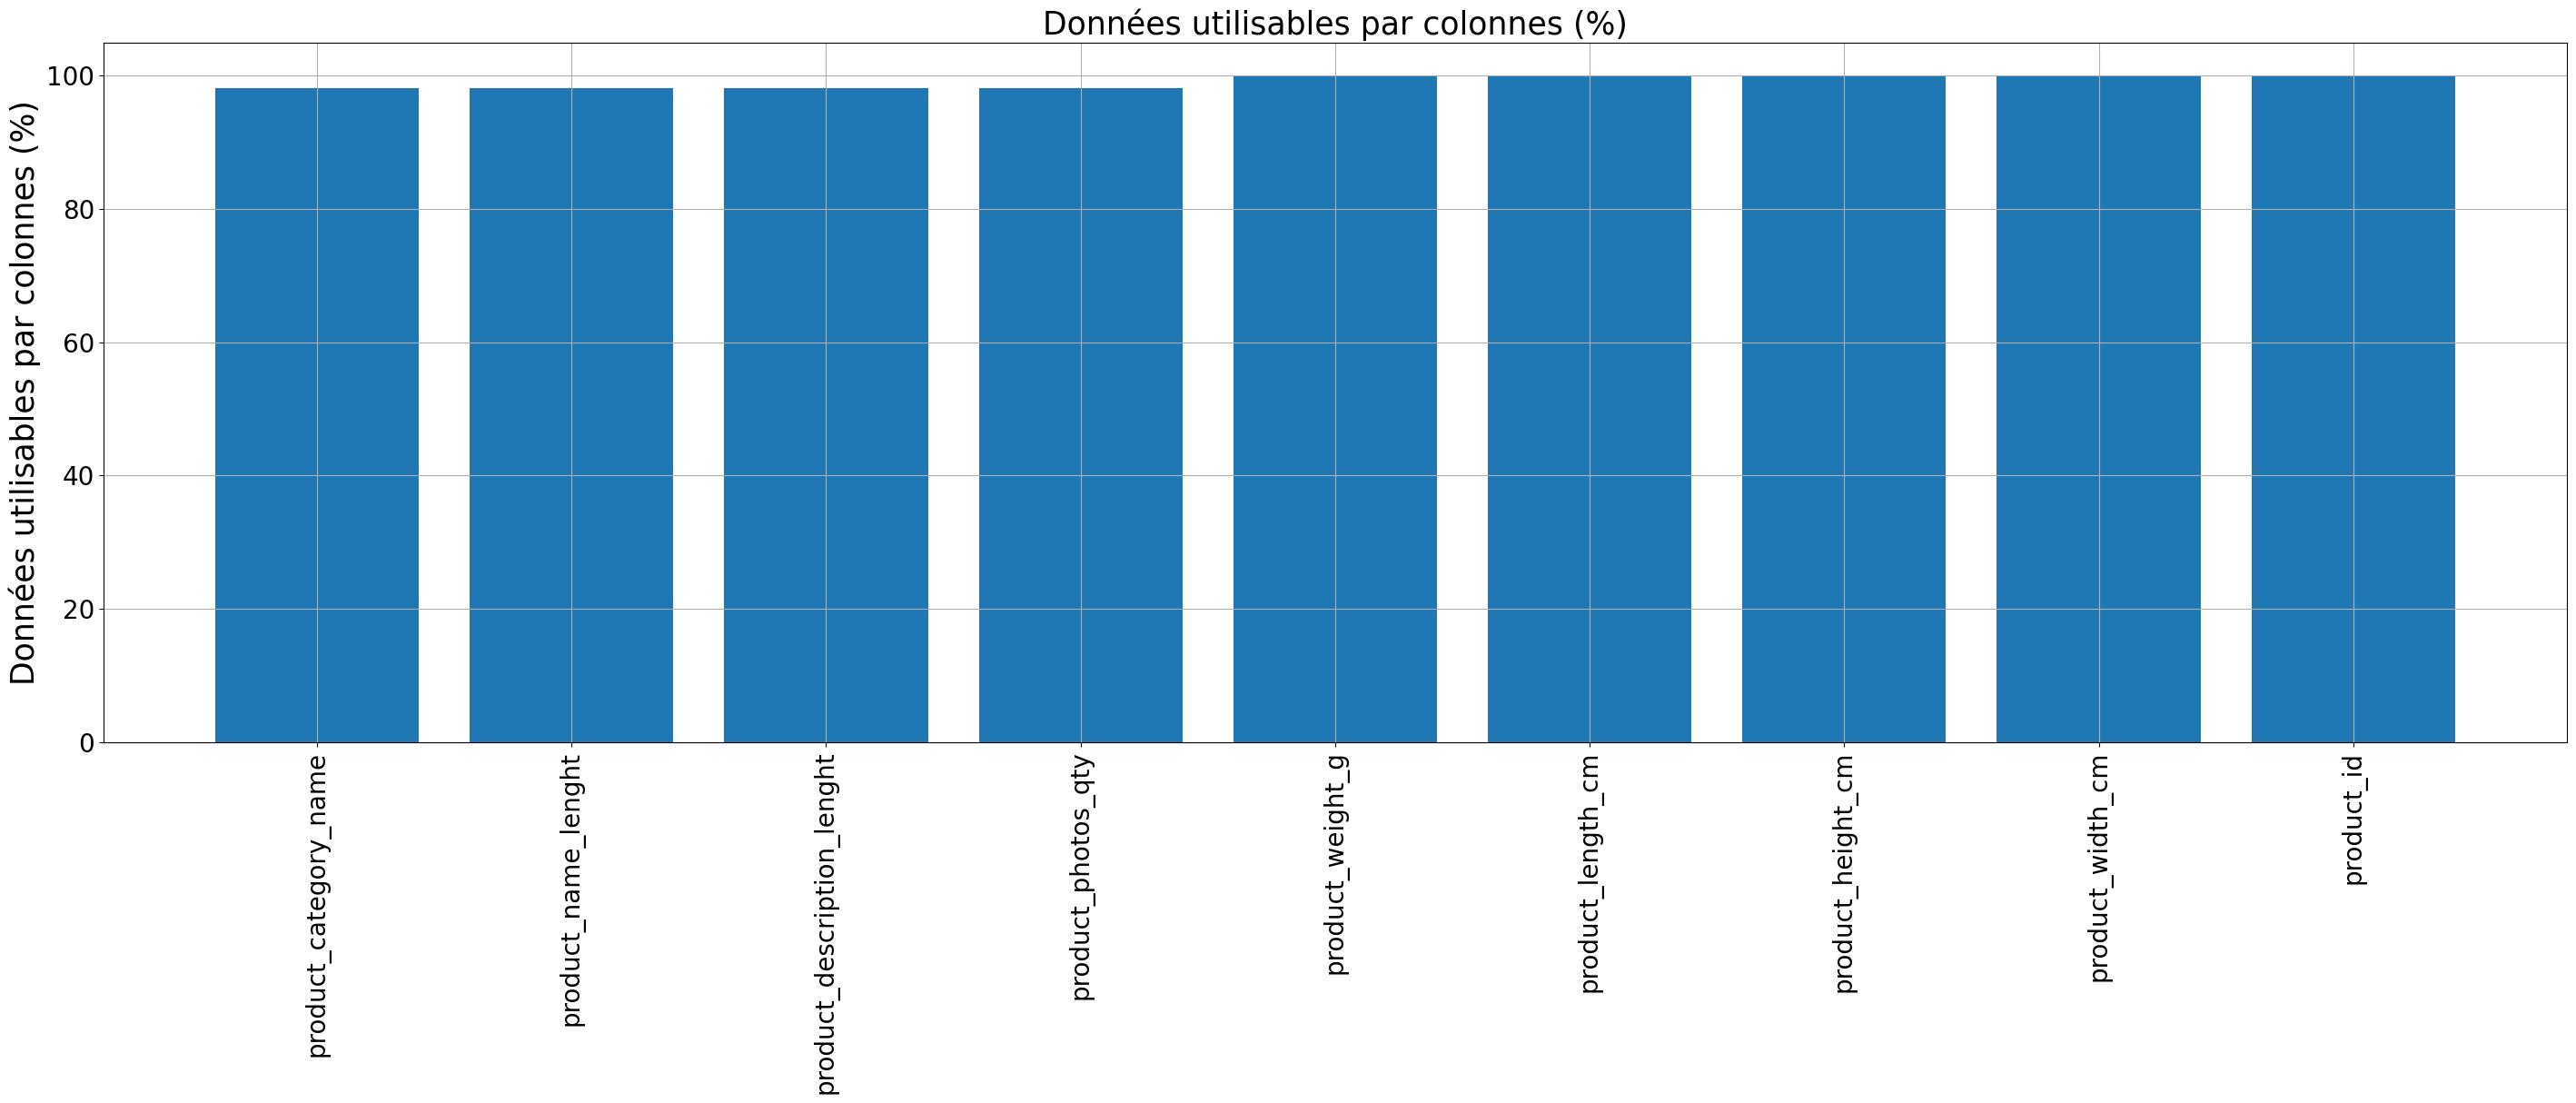

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [6]:
Df_products = pd.read_csv('olist_products_dataset.csv').drop_duplicates()
print('Df_products')
print(Df_products.columns.values)
info_data_unique(Df_products)

#Quelques valeurs manquantes:
plot_valeurs_utilisables(Df_products)

Df_products.head()
#Un lit :40Kg => Ok
Df_products[Df_products.product_weight_g>25000]

Df_products.describe()

In [179]:
Df_products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [183]:
#il ya 2 catégories de plus que dans le Df_catégorie
Df_products.nunique()
print(Df_products.product_category_name[~Df_products.product_category_name.isin(Df_category_name.product_category_name)].unique())

[nan 'pc_gamer' 'portateis_cozinha_e_preparadores_de_alimentos']


Df_orders
['order_id' 'customer_id' 'order_status' 'order_purchase_timestamp'
 'order_approved_at' 'order_delivered_carrier_date'
 'order_delivered_customer_date' 'order_estimated_delivery_date']
les colonnes sont de types :   [dtype('O')]
  
il y a : 99441 lignes, 8 colonnes
  
il y a : 99.4 % de valeurs utilisables


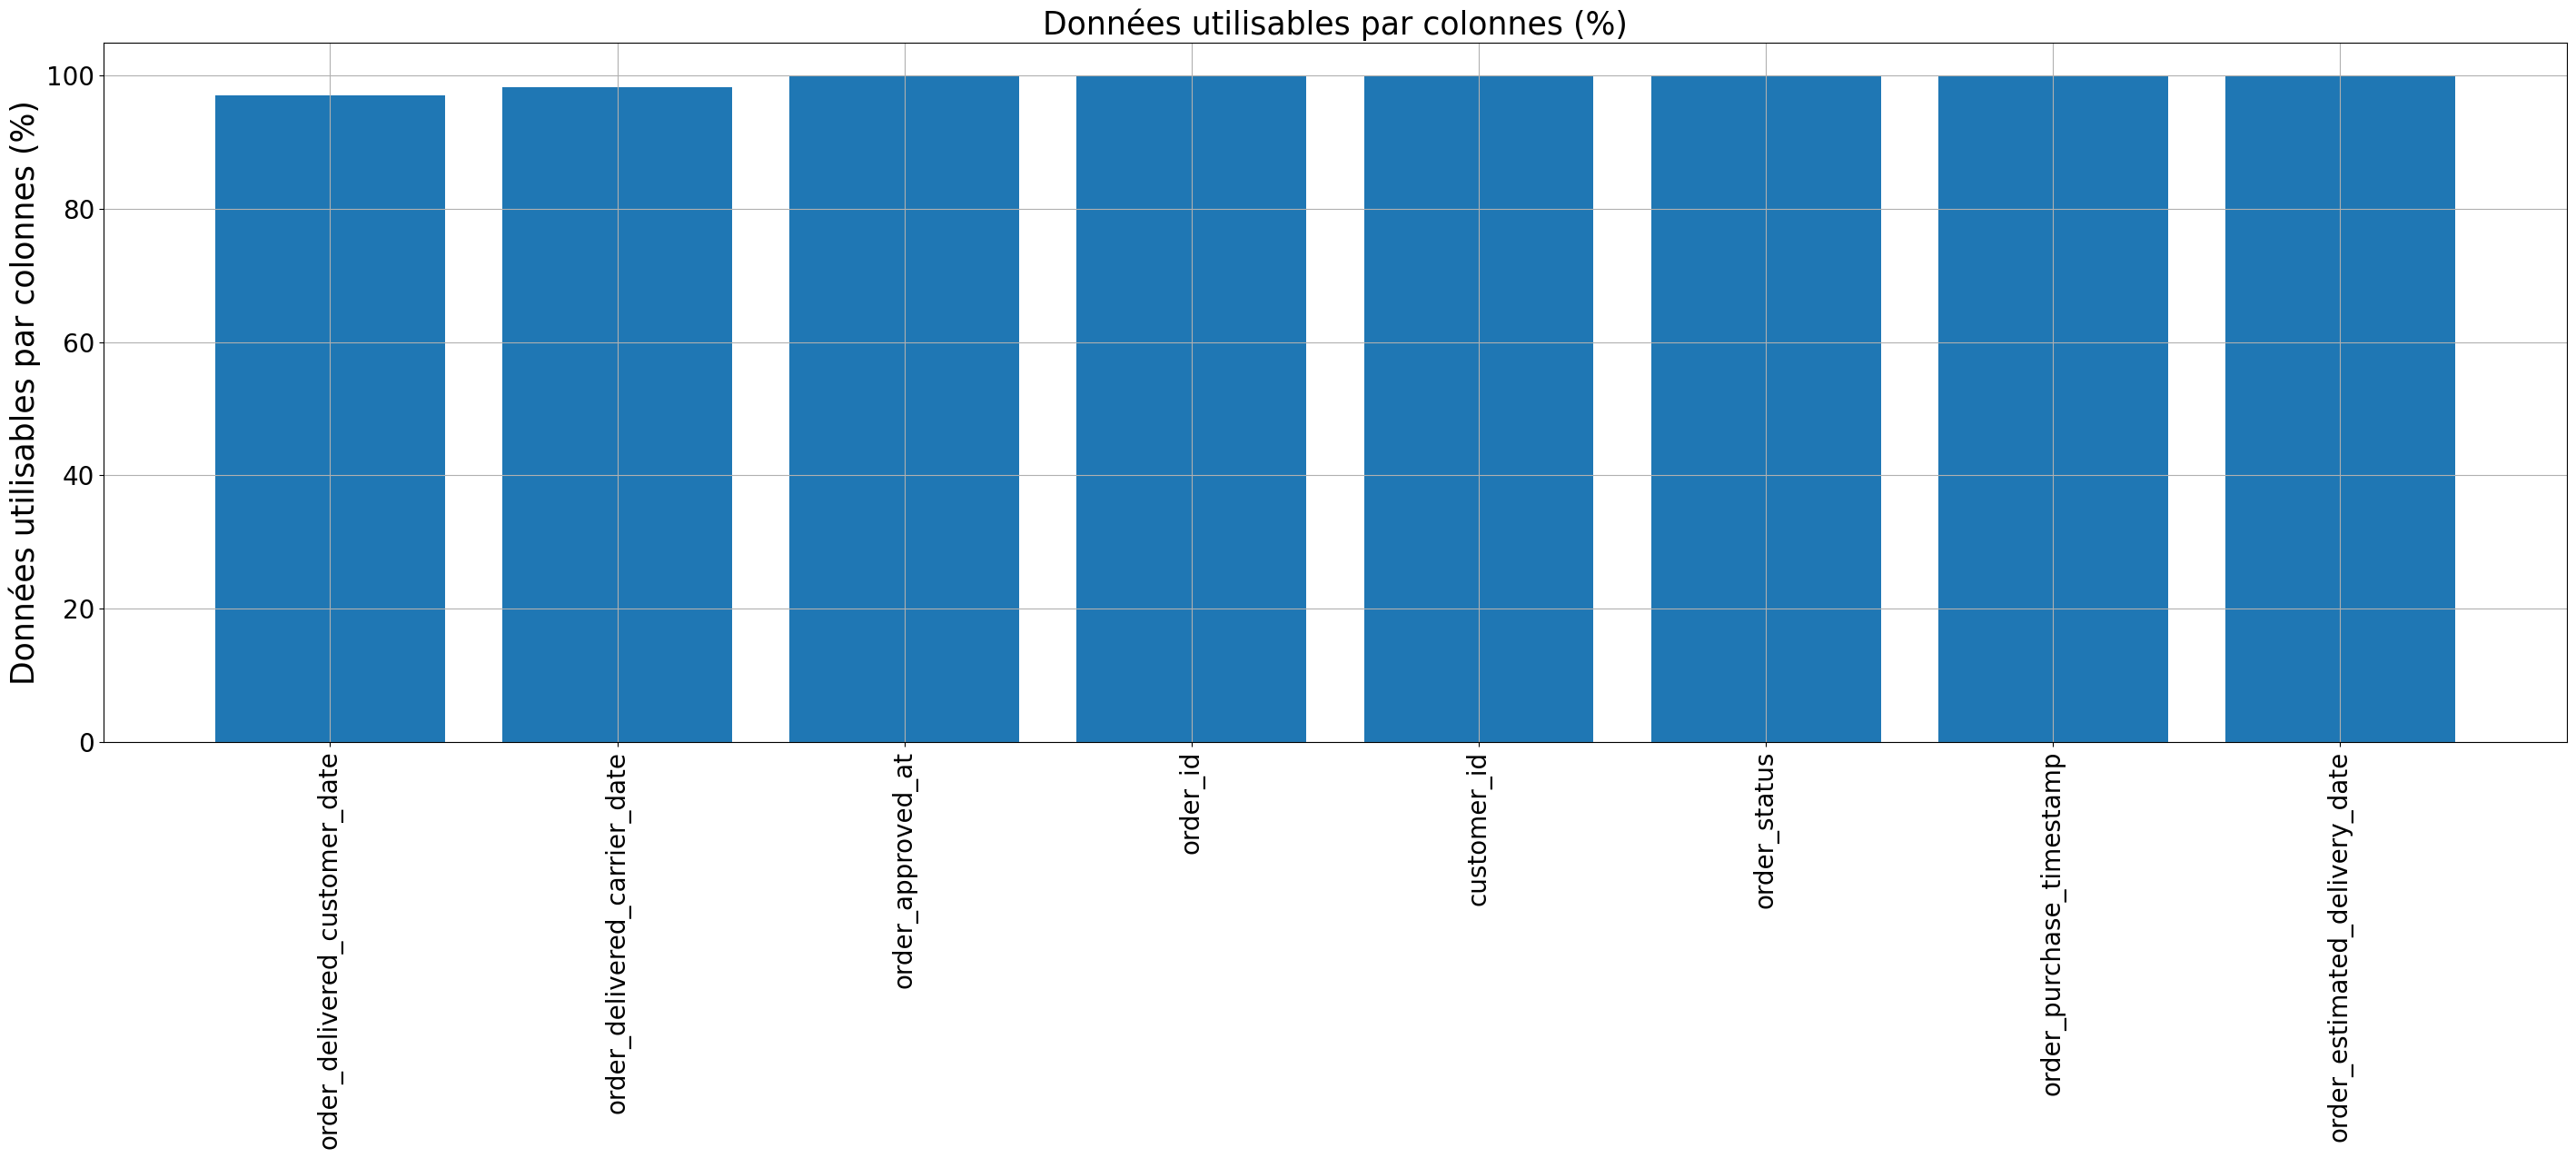

different types of order_status : ['delivered' 'invoiced' 'shipped' 'canceled' 'processing' 'unavailable'
 'approved']


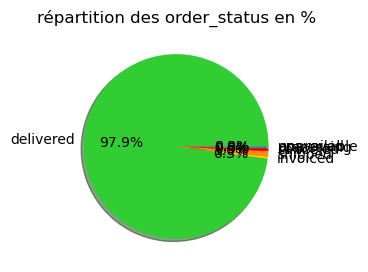

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
13390,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00


In [148]:
Df_orders = pd.read_csv('olist_orders_dataset.csv').drop_duplicates()
print('Df_orders')

print(Df_orders.columns.values)
info_data_unique(Df_orders)


plot_valeurs_utilisables(Df_orders)

print("different types of order_status :",Df.order_status.unique())

#Vérifions la répartition par nutrition grade
Df_reparti_grade=pd.DataFrame()
fig=plt.figure(figsize=(3,3))
for status in Df.order_status.unique() :
    Df_reparti_grade[status] = [len(Df[Df['order_status']==status])/len(Df)*100]
    
Df_reparti_grade =Df_reparti_grade.T
plt.pie(Df_reparti_grade[0], labels=Df_reparti_grade.index, autopct='%1.1f%%', shadow=True,colors = colors)
plt.title("répartition des order_status en %")
plt.show()



Df_orders[Df_orders.order_id=='03caa2c082116e1d31e67e9ae3700499']


Df_order_reviews
['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']
les colonnes sont de types :   [dtype('O') dtype('int64')]
  
il y a : 99224 lignes, 7 colonnes
  
il y a : 79.0 % de valeurs utilisables
 
4 --- recomendo
5 --- Super recomendo
1 --- Não chegou meu produto 
5 --- Ótimo
4 --- Muito bom.
5 --- Bom
5 --- Maravilhoso!
5 --- Entrega perfeita
5 --- MT lindo
5 --- Ótimo Produto! 
5 --- RECOMENDO SEMPRE!!
5 --- ***** Recomendo
5 --- OTIMO
3 --- Entrega atrasou
5 --- muito boa
4 ---  4 
1 --- Médio
5 --- prazo entrega
5 --- Super produto 
1 --- falta de produto e quebra


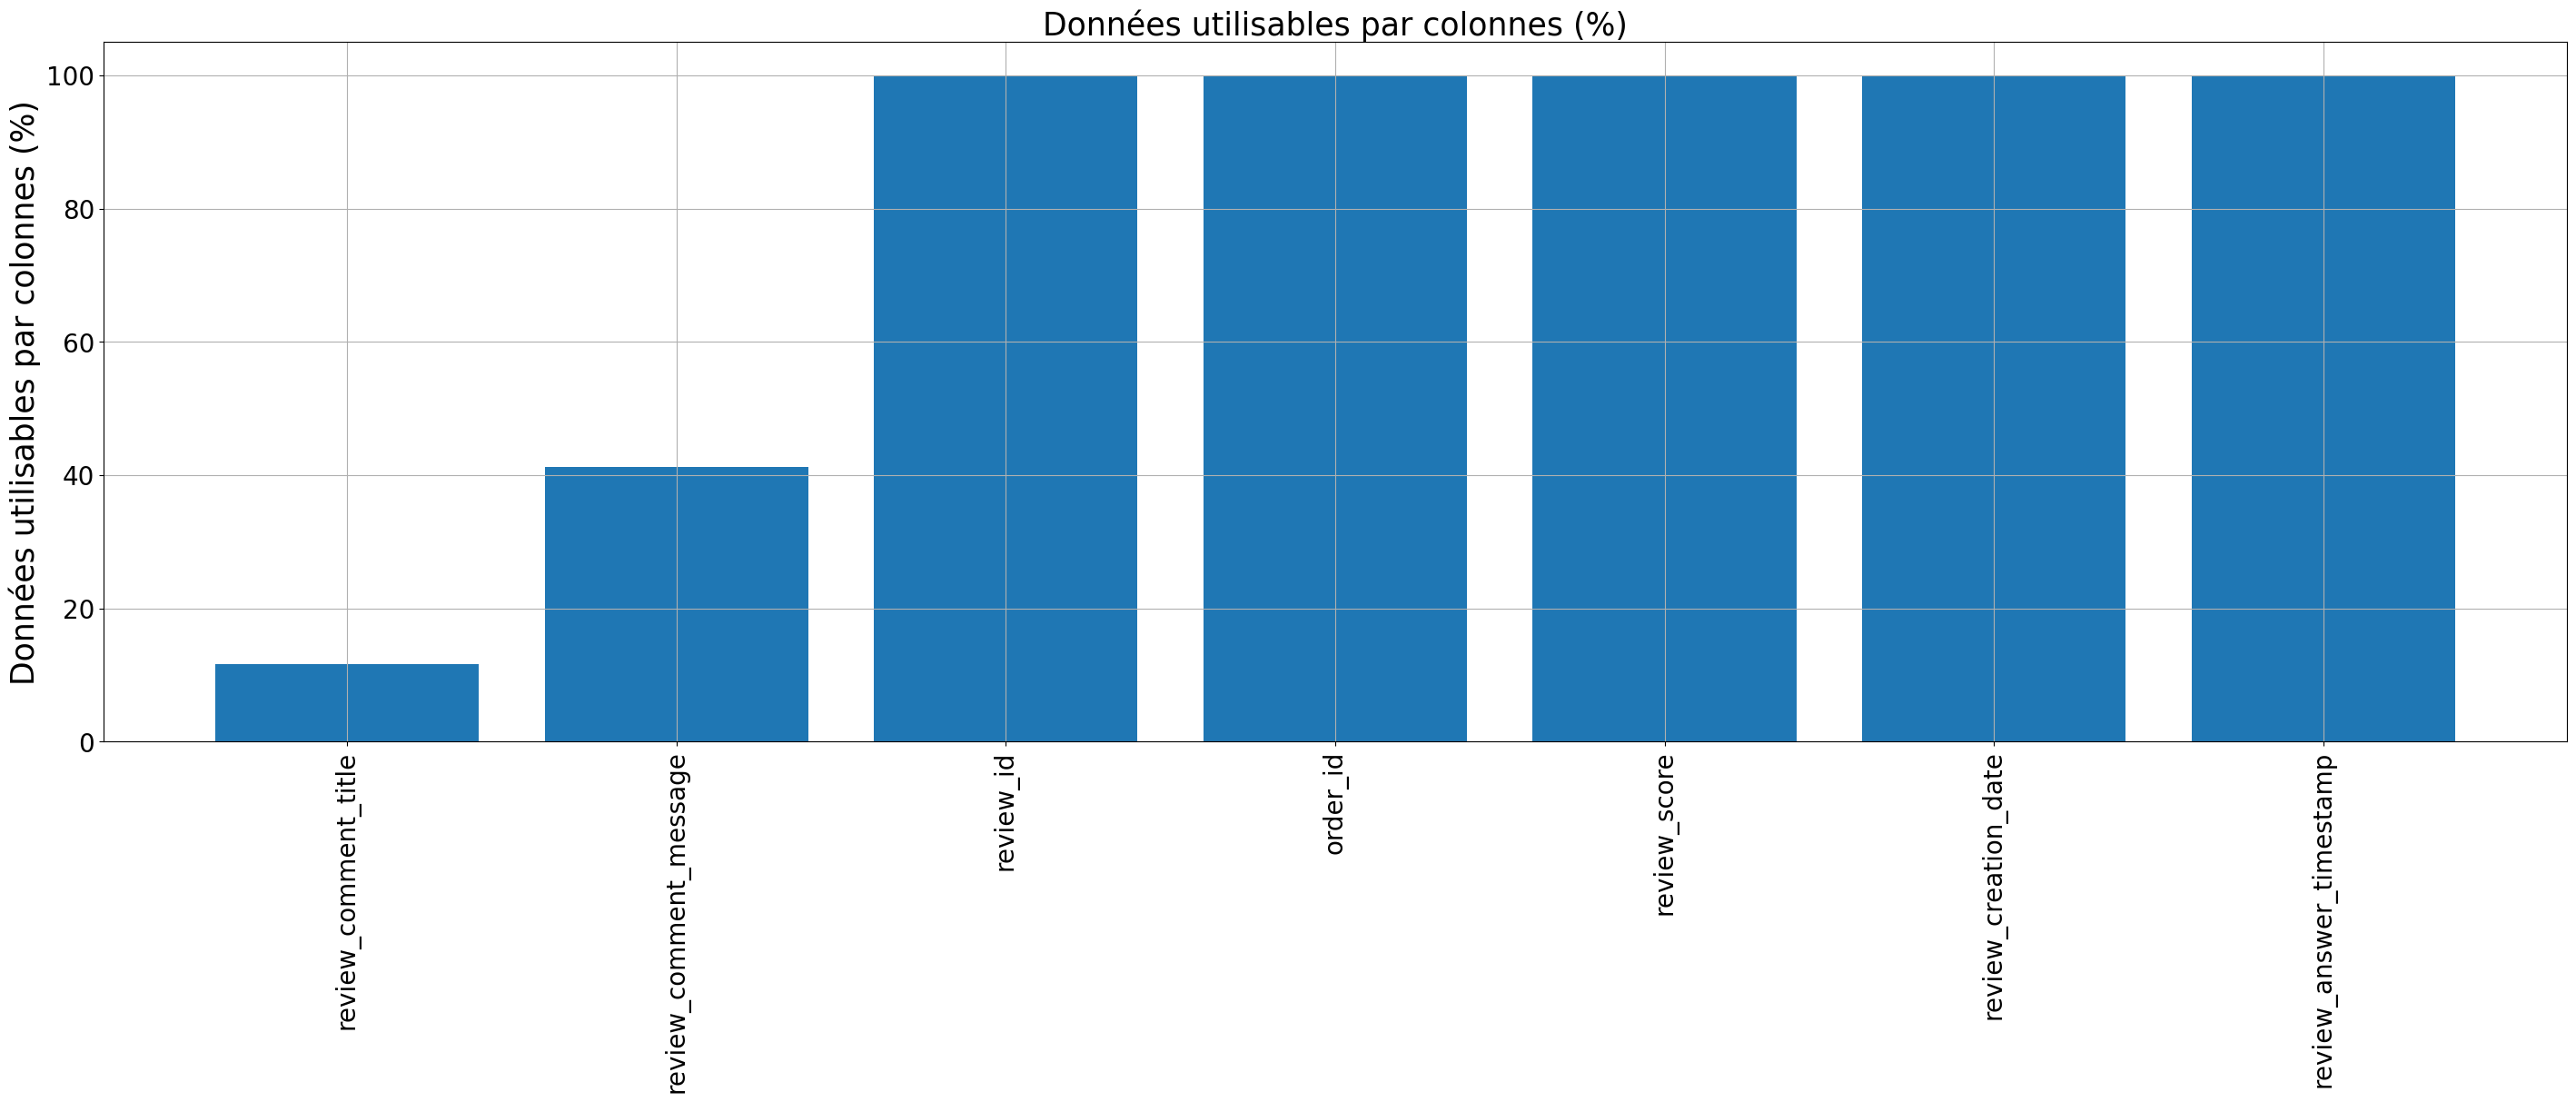

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
29745,211fa81a22870cc634265ea85b751e40,03caa2c082116e1d31e67e9ae3700499,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39


In [8]:
Df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv').drop_duplicates()
print('Df_order_reviews')
print(Df_order_reviews.columns.values)
info_data_unique(Df_order_reviews)
Df_order_reviews.describe()

print(' ')
Df_order_reviews_dropna= Df_order_reviews.dropna()
for score, title in zip(Df_order_reviews_dropna['review_score'][0:20],Df_order_reviews_dropna['review_comment_title'][0:20]) :
    print(score,"---",title)
    
#0 = pas du tout content
#5 = très content

plot_valeurs_utilisables(Df_order_reviews)

#Un payement de 13000 avec un score de 1 : pas cool
Df_order_reviews[Df_order_reviews.order_id=='03caa2c082116e1d31e67e9ae3700499']


In [173]:
Df_payements = pd.read_csv('olist_order_payments_dataset.csv').drop_duplicates()
print('Df_payements')

print(Df_payements.columns.values)
info_data_unique(Df_payements)

#Les payements en plus 20 fois sont fait avec des bons
Df_payements[Df_payements.payment_sequential>20].sort_values(by='order_id')

Df_payements[Df_payements.payment_value>800].sort_values(by='order_id')

#Un payement de 6000 en billet c'est étrange

Df_payements.describe()

#Certains payement sont de 0
Df_payements[Df_payements.payment_value==0]
Df_payements[Df_payements.order_id=='8bcbe01d44d147f901cd3192671144db']



Df_payements
['order_id' 'payment_sequential' 'payment_type' 'payment_installments'
 'payment_value']
les colonnes sont de types :   [dtype('O') dtype('int64') dtype('float64')]
  
il y a : 103886 lignes, 5 colonnes
  
il y a : 100.0 % de valeurs utilisables


,order_id,payment_sequential,payment_type,payment_installments,payment_value
5163,8bcbe01d44d147f901cd3192671144db,3,voucher,1,6.25
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
20963,8bcbe01d44d147f901cd3192671144db,1,credit_card,1,36.21
63762,8bcbe01d44d147f901cd3192671144db,2,voucher,1,31.70


In [172]:
Df_order_items = pd.read_csv('olist_order_items_dataset.csv').drop_duplicates()
print('Df_order_items')

print(Df_order_items.columns.values)
info_data_unique(Df_order_items)


Df_order_items[Df_order_items.freight_value>300]

#Une commande avec plusieurs fois le même produit dedans
Df_order_items[Df_order_items.order_id=='03caa2c082116e1d31e67e9ae3700499']

Df_order_items.describe()
Df_order_items[Df_order_items.order_item_id>18].sort_values(by='order_id')

Df_order_items[Df_order_items.order_id=='8bcbe01d44d147f901cd3192671144db']



Df_order_items
['order_id' 'order_item_id' 'product_id' 'seller_id' 'shipping_limit_date'
 'price' 'freight_value']
les colonnes sont de types :   [dtype('O') dtype('int64') dtype('float64')]
  
il y a : 112650 lignes, 7 colonnes
  
il y a : 100.0 % de valeurs utilisables


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
61321,8bcbe01d44d147f901cd3192671144db,1,85d4c1a46f08f730de651ea6f6645313,3d871de0142ce09b7081e2b9d1733cb1,2018-01-30 23:37:20,59.0,15.16


In [11]:
Df_geo = pd.read_csv('olist_geolocation_dataset.csv').drop_duplicates()
print('Df_geo')
print(Df_geo.columns.values)
info_data_unique(Df_geo)
Df_geo.describe()

Df_geo
['geolocation_zip_code_prefix' 'geolocation_lat' 'geolocation_lng'
 'geolocation_city' 'geolocation_state']
les colonnes sont de types :   [dtype('int64') dtype('float64') dtype('O')]
  
il y a : 738332 lignes, 5 colonnes
  
il y a : 100.0 % de valeurs utilisables


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394


In [12]:
Df_customers = pd.read_csv('olist_customers_dataset.csv').drop_duplicates()
print('Df_customers')

print(Df_customers.columns.values)
info_data_unique(Df_customers)


Df_customers
['customer_id' 'customer_unique_id' 'customer_zip_code_prefix'
 'customer_city' 'customer_state']
les colonnes sont de types :   [dtype('O') dtype('int64')]
  
il y a : 99441 lignes, 5 colonnes
  
il y a : 100.0 % de valeurs utilisables


In [13]:
#Regardons le nom des colonne, le type de variable et leurs taux de valeurs utilisables
print('Df_category_name')
print(Df_category_name.columns.values)
print(' ')

print('Df_sellers')
print(Df_sellers.columns.values)

print(' ')

print('Df_products')
print(Df_products.columns.values)

print(' ')

print('Df_orders')
print(Df_orders.columns.values)

print(' ')

print('Df_order_reviews')
print(Df_order_reviews.columns.values)

print(' ')

print('Df_payements')
print(Df_payements.columns.values)

print(' ')

print('Df_order_items')
print(Df_order_items.columns.values)

print(' ')

print('Df_geo')
print(Df_geo.columns.values)
print(' ')


print('Df_customers')
print(Df_customers.columns.values)


Df_category_name
['product_category_name' 'product_category_name_english']
 
Df_sellers
['seller_id' 'seller_zip_code_prefix' 'seller_city' 'seller_state']
 
Df_products
['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']
 
Df_orders
['order_id' 'customer_id' 'order_status' 'order_purchase_timestamp'
 'order_approved_at' 'order_delivered_carrier_date'
 'order_delivered_customer_date' 'order_estimated_delivery_date']
 
Df_order_reviews
['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']
 
Df_payements
['order_id' 'payment_sequential' 'payment_type' 'payment_installments'
 'payment_value']
 
Df_order_items
['order_id' 'order_item_id' 'product_id' 'seller_id' 'shipping_limit_date'
 'price' 'freight_value']
 
Df_geo
['geolocation_zip_code_prefix' 'geolocation_lat' 'geo

In [193]:
Df_order_items.groupby(by= 'order_id').sum().sort_values(by='order_item_id',ascending=False)



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11932,1b15974a0141d54e36626dca3fdc731a,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11933,1b15974a0141d54e36626dca3fdc731a,2,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11934,1b15974a0141d54e36626dca3fdc731a,3,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11935,1b15974a0141d54e36626dca3fdc731a,4,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11936,1b15974a0141d54e36626dca3fdc731a,5,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11937,1b15974a0141d54e36626dca3fdc731a,6,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11938,1b15974a0141d54e36626dca3fdc731a,7,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11939,1b15974a0141d54e36626dca3fdc731a,8,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11940,1b15974a0141d54e36626dca3fdc731a,9,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11941,1b15974a0141d54e36626dca3fdc731a,10,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12


In [23]:
Df= pd.merge(pd.merge(pd.merge(Df_order_items,Df_orders),Df_sellers),Df_order_reviews)


In [112]:
Df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'number_of_sales'], dtype='object')

In [35]:
#Calculons le nombre de ventes par vendeurs 

Df['number_of_sales']=0
for seller in Df.seller_id.unique():
    Df['number_of_sales'][Df.seller_id==seller] = Df.order_id[Df.seller_id==seller].nunique()

C:\Users\33646\AppData\Local\Temp/ipykernel_10844/2060765182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['number_of_sales'][Df.seller_id==seller] = Df.order_id[Df.seller_id==seller].nunique()


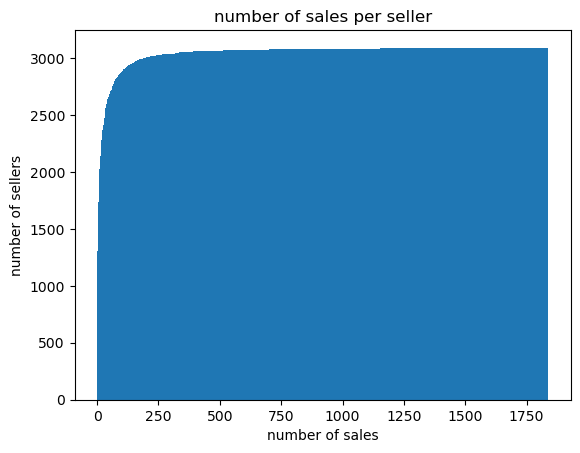

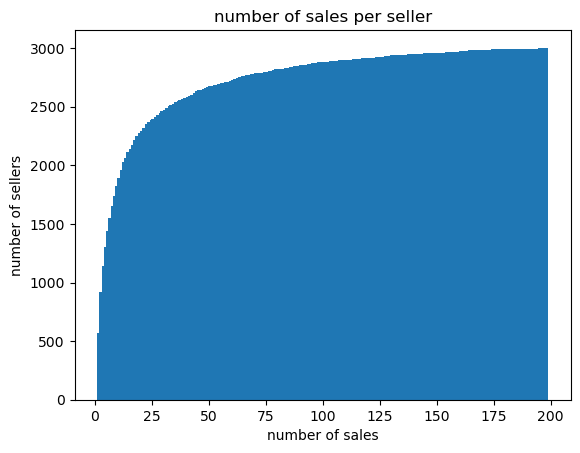

In [111]:
#Gardons une ligne par evndeur et plotons la répartition du nombre de vente par vendeur
hist_of_sales= Df[["seller_id","number_of_sales"]].drop_duplicates().iloc[:,1]
plt.hist(hist_of_sales,bins=500,cumulative=True)
plt.title('number of sales per seller')
plt.xlabel('number of sales')
plt.ylabel('number of sellers')
plt.show()

hist_of_sales= Df[["seller_id","number_of_sales"]].drop_duplicates()\
                .iloc[:,1][Df[["seller_id","number_of_sales"]].drop_duplicates().iloc[:,1]<200]
plt.hist(hist_of_sales,bins=500,cumulative=True)
plt.title('number of sales per seller')
plt.xlabel('number of sales')
plt.ylabel('number of sellers')
plt.show()

In [114]:
Df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,number_of_sales
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,27277,volta redonda,SP,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,138
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,2017-07-25 14:35:11,2017-07-27 18:45:50,2017-07-28 16:18:00,2017-08-08 00:00:00,27277,volta redonda,SP,1fac9acb29e014e3b9b393d5c8505f99,5,NaN,ÓTIMO,2017-07-29 00:00:00,2017-08-01 20:55:50,138
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,2017-08-10 12:30:15,2017-08-15 19:26:45,2017-08-24 18:15:16,2017-09-08 00:00:00,27277,volta redonda,SP,2eab04a8f45efa131d44cf58b37ab595,5,NaN,Recebi o patines em perfeitas condições bem an...,2017-08-25 00:00:00,2017-08-28 12:57:25,138
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,2017-10-03 10:35:11,2017-10-09 17:57:50,2017-10-19 21:03:49,2017-10-25 00:00:00,27277,volta redonda,SP,9d0e152a1983460f059ddffcb8af03bb,5,NaN,NaN,2017-10-20 00:00:00,2017-10-20 23:45:27,138
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,2017-07-01 15:43:50,2017-07-05 12:00:33,2017-07-10 17:17:21,2017-07-25 00:00:00,27277,volta redonda,SP,f4fad24d4bb3462bab004be9a0b753f0,4,NaN,"Atendimento excelente,o produto chegou antes d...",2017-07-11 00:00:00,2017-07-13 23:18:14,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.90,16.14,81ae83ce1a10af9f93fa3512bd9713b1,delivered,2017-04-19 10:20:51,2017-04-21 05:10:28,2017-05-04 15:06:24,2017-05-24 10:52:43,2017-05-22 00:00:00,80220,curitiba,PR,fd48db39884359395ff6f18c8822aa7b,4,NaN,NaN,2017-05-25 00:00:00,2017-05-26 11:42:36,1
112368,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,8fbd29638b8ddd97d012473abf1f7752,delivered,2017-02-24 22:28:55,2017-02-24 22:42:22,2017-03-04 11:58:57,2017-03-14 16:17:59,2017-03-21 00:00:00,14402,franca,SP,63fedff4710feb37d0a2f8ba28187cb2,4,NaN,NaN,2017-03-15 00:00:00,2017-03-20 13:29:17,1
112369,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,2017-08-12 02:55:27,2017-08-14 22:03:19,2017-08-17 17:47:55,2017-09-04 00:00:00,82620,curitiba,PR,cd6f089e896732c91671704c7f51790e,4,NaN,NaN,2017-08-18 00:00:00,2017-08-19 13:16:38,1
112370,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,8f6d16c31abb30b7b4650272cb0014a3,delivered,2018-04-12 19:47:40,2018-04-12 20:10:33,2018-04-18 00:41:2

In [116]:
Df.groupby('seller_id').sum()

,order_item_id,price,freight_value,seller_zip_code_prefix,review_score,number_of_sales
seller_id,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,3,2685.00,63.06,27240,11,9
001cca7ae9ae17fb1caed9dfb1094831,289,24770.03,8757.89,6880816,921,46492
001e6ad469a905060d959994f1b41e4f,1,250.00,17.94,24754,1,1
002100f778ceb8431b7a1020ff7ab48f,61,1254.40,806.45,806680,223,2856
003554e2dce176b5555353e4f3555ac8,1,120.00,19.38,74565,5,1
...,...,...,...,...,...,...
ffcfefa19b08742c5d315f2791395ee5,1,69.90,9.62,80045,1,1
ffdd9f82b9a447f6f8d4b91554cc7dd3,22,2101.20,727.46,1600600,85,360
ffeee66ac5d5a62fe688b9d26f83f534,14,1839.86,419.69,211820,59,196


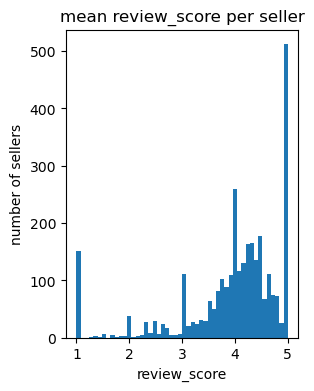

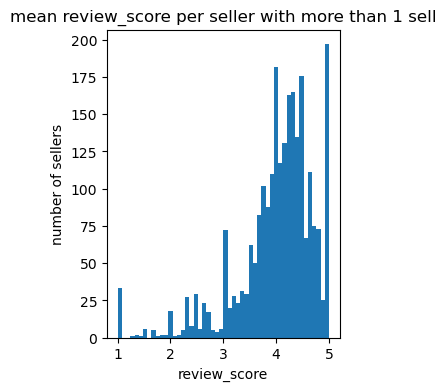

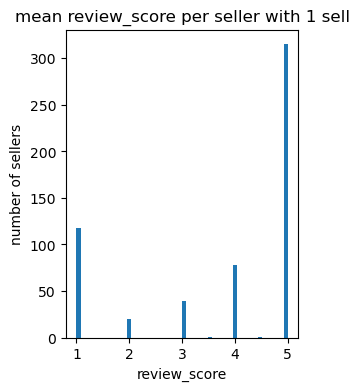

In [109]:
#Calculons la répartition moyenne des review_score par vendeur
review_score_hist = Df[["seller_id","review_score"]].groupby('seller_id').mean()

fig=plt.figure(figsize=(3,4))
plt.hist(review_score_hist,bins=50)
plt.title('mean review_score per seller')
plt.xlabel('review_score')
plt.ylabel('number of sellers')
plt.show()

#Calculons la répartition moyenne des review_score par vendeur (avec plus d'une vente)
multi_order_review_score_hist = Df[["seller_id","review_score"]][Df.number_of_sales>1].groupby('seller_id').mean()

fig=plt.figure(figsize=(3,4))
plt.hist(multi_order_review_score_hist,bins=50)
plt.title('mean review_score per seller with more than 1 sell')
plt.xlabel('review_score')
plt.ylabel('number of sellers')
plt.show()

#Calculons la répartition moyenne des review_score par vendeur (avec une seule vente)
multi_order_review_score_hist = Df[["seller_id","review_score"]][Df.number_of_sales==1].groupby('seller_id').mean()

fig=plt.figure(figsize=(3,4))
plt.hist(multi_order_review_score_hist,bins=50)
plt.title('mean review_score per seller with 1 sell')
plt.xlabel('review_score')
plt.ylabel('number of sellers')
plt.show()

In [166]:
review_score_hist.head(1)

,review_score
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,3.666667


In [169]:
review_score_hist = review_score_hist.reset_index()

Df['mean_review_score']=0


In [170]:
for seller in Df["seller_id"].drop_duplicates():
    Df.mean_review_score[Df.seller_id == seller] = review_score_hist.review_score[review_score_hist.seller_id==seller]

C:\Users\33646\AppData\Local\Temp/ipykernel_10844/895403020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df.mean_review_score[Df.seller_id == seller] = review_score_hist.review_score[review_score_hist.seller_id==seller]


In [157]:
Df['']
Df_final = pd.merge(Df[["seller_id","number_of_sales"]],review_score_hist).drop_duplicates()

Df_final.iloc[:,1:].head(1)
Df_final.shape

(3090, 3)

In [ ]:
X= Df_final.iloc[:,1:].values

In [ ]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

AttributeError: module 'matplotlib.pyplot' has no attribute 'tile'

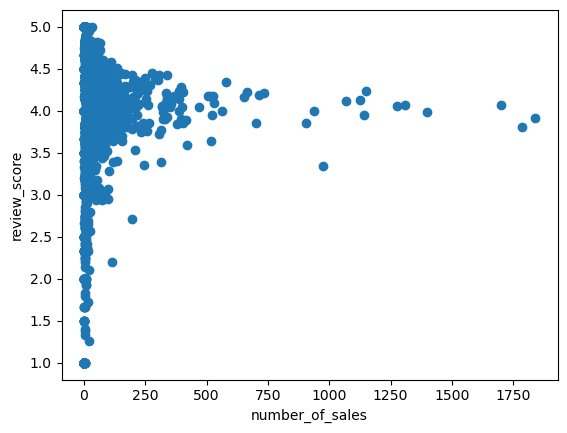

In [163]:
plt.scatter(Df_final.iloc[:,1:2],Df_final.iloc[:,2:3])
plt.ylabel('review_score')
plt.xlabel('number_of_sales')
plt.title("Répartition du review_score par number_of_sales")
plt.show()

In [165]:
# Puis on applique tSNE aux données scalées :
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
X_trans = tsne.fit_transform(X_scaled)

KeyboardInterrupt: 